In [2]:
#pakage imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#correct path for data import: local or google drive
path_local = 'data'    
path_drive = '/home/ira/google-drive/Cambridge/Michaelmas 2020/flood_data'
    
#files containing nrfa data    
Catchment_Daily_Rainfall = '/54106_cdr.csv'
Gauged_Daily_Flow = '/54106_gdf.csv'

#creating dataframes to store data depending on which path is needed
try:
    path = path_drive
    cdr_df= pd.read_csv(path + Catchment_Daily_Rainfall)
    gdf_df= pd.read_csv(path + Gauged_Daily_Flow)

except FileNotFoundError:
    path = path_local
    cdr_df= pd.read_csv(path + Catchment_Daily_Rainfall)
    gdf_df= pd.read_csv(path + Gauged_Daily_Flow)

    
#storing metadata in seperate dataframes
cdr_metadata = cdr_df.head(19)
gdf_metadata = gdf_df.head(19)

#storing removing metadata from data dataframee, renaming columns and alterning datatype
cdr_df = cdr_df[19:]
cdr_df[["rainfall"]] = cdr_df[["timestamp"]].apply(pd.to_numeric)
cdr_df[["date"]] = cdr_df[["file"]]
cdr_df = cdr_df[['date', 'rainfall']]

gdf_df = gdf_df[19:]
gdf_df[["flow"]] = gdf_df[["timestamp"]].apply(pd.to_numeric)
gdf_df[["date"]] = gdf_df[["file"]]
gdf_df = gdf_df[['date', 'flow']]

In [4]:
cdr_metadata

,file,timestamp,2020-10-15T16:20:36
0,database,id,nrfa-public-17
1,database,name,UK National River Flow Archive
2,station,id,54106
3,station,name,Stour (Warks) at Shipston
4,station,gridReference,SP2604240517
5,station,descriptionSummary,Open channel used by FFS (flood forecasting) o...
6,station,descriptionGeneral,Flat V weir with cableway opened in January 2000.
7,station,descriptionStationHydrometry,During dry periods the stilling well bottoms o...
8,station,descriptionFlowRecord,"Station flooded during July 2007, high flows b..."
9,station,descriptionCatchment,"Moderately high relief, mainly agricultural ca..."


In [5]:
gdf_metadata

,file,timestamp,2020-10-15T16:19:54
0,database,id,nrfa-public-17
1,database,name,UK National River Flow Archive
2,station,id,54106
3,station,name,Stour (Warks) at Shipston
4,station,gridReference,SP2604240517
5,station,descriptionSummary,Open channel used by FFS (flood forecasting) o...
6,station,descriptionGeneral,Flat V weir with cableway opened in January 2000.
7,station,descriptionStationHydrometry,During dry periods the stilling well bottoms o...
8,station,descriptionFlowRecord,"Station flooded during July 2007, high flows b..."
9,station,descriptionCatchment,"Moderately high relief, mainly agricultural ca..."


In [6]:
cdr_df.tail(10)

,date,rainfall
20828,2017-12-22,0.1
20829,2017-12-23,0.0
20830,2017-12-24,0.0
20831,2017-12-25,13.1
20832,2017-12-26,28.6
20833,2017-12-27,1.2
20834,2017-12-28,5.5
20835,2017-12-29,1.9
20836,2017-12-30,3.2
20837,2017-12-31,1.0


In [7]:
gdf_df.tail(10)

,date,flow
5395,2019-09-21,0.326
5396,2019-09-22,0.424
5397,2019-09-23,0.440
5398,2019-09-24,1.140
5399,2019-09-25,0.692
5400,2019-09-26,0.569
5401,2019-09-27,0.643
5402,2019-09-28,1.660
5403,2019-09-29,4.420
5404,2019-09-30,1.990


<BarContainer object of 100 artists>

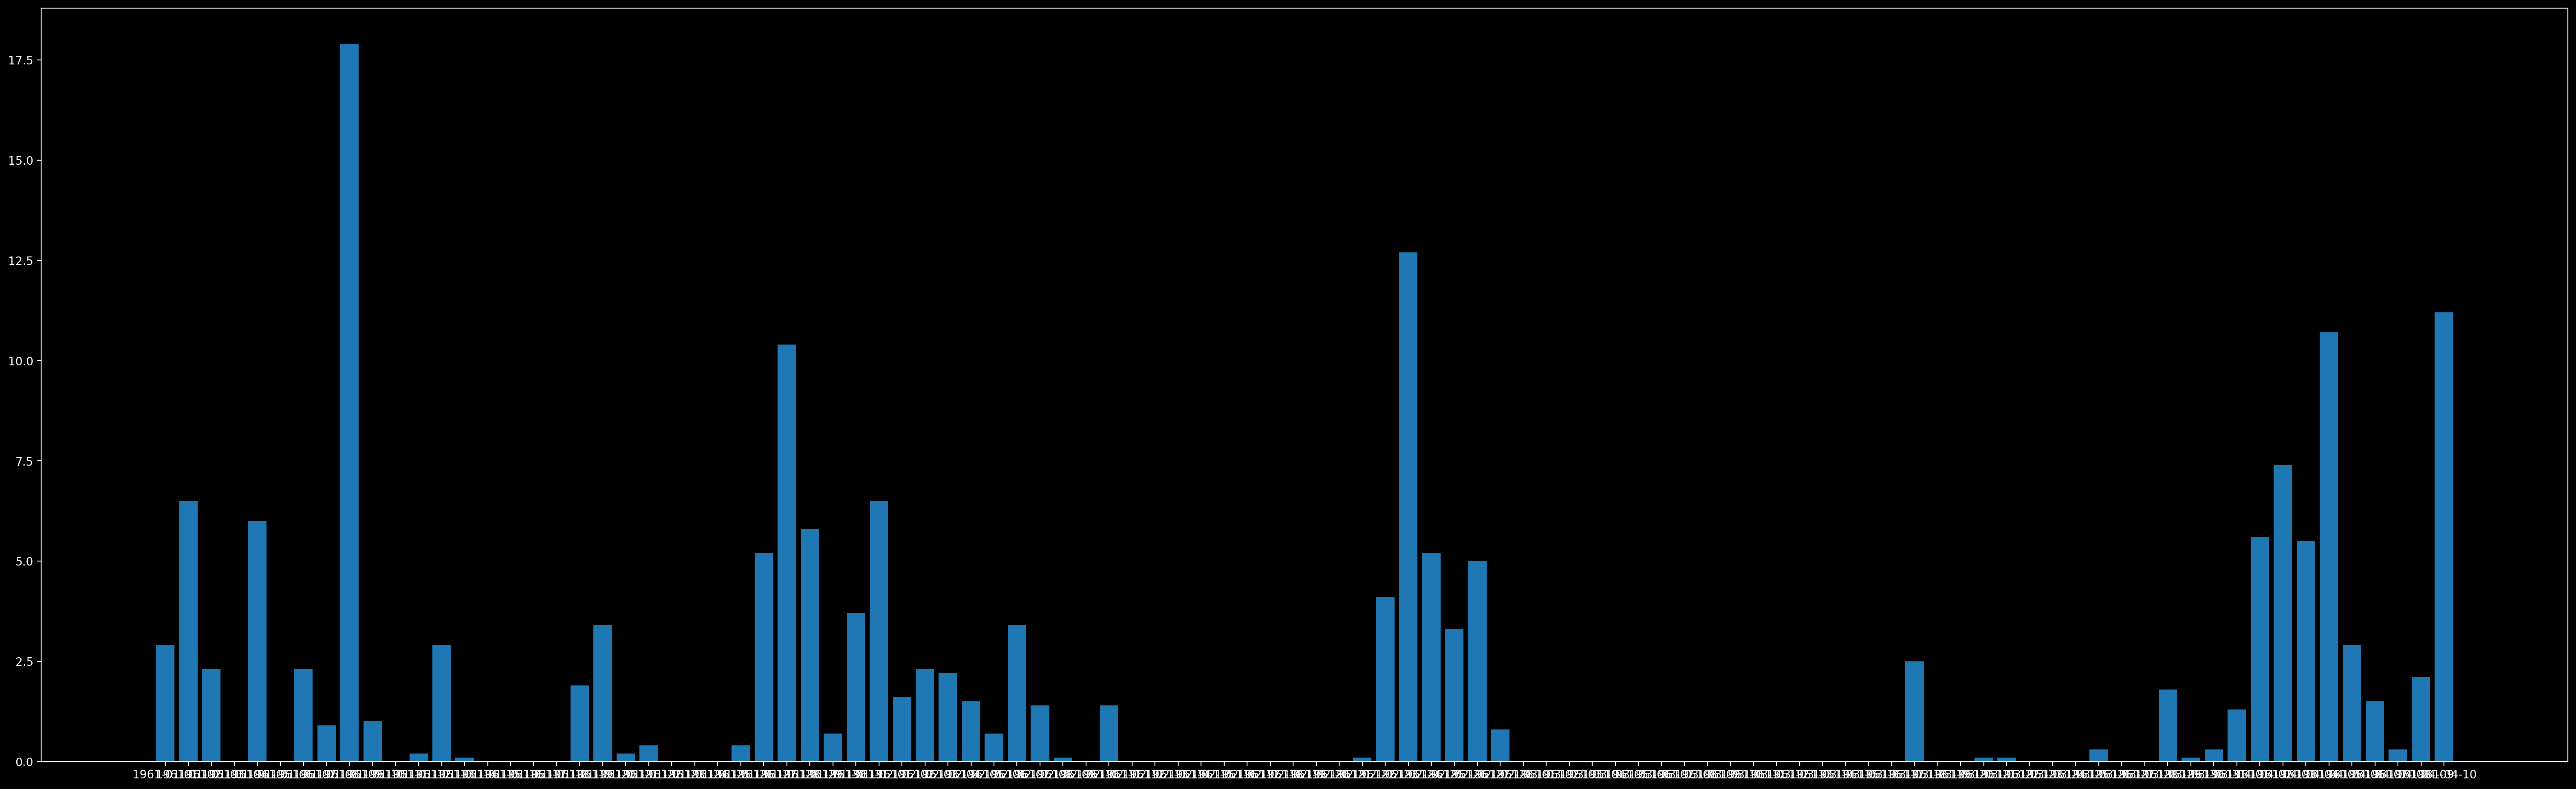

In [6]:
plt.figure(figsize=(40,12))
plt.bar(cdr_df['date'][:100],cdr_df['rainfall'][:100])

<BarContainer object of 100 artists>

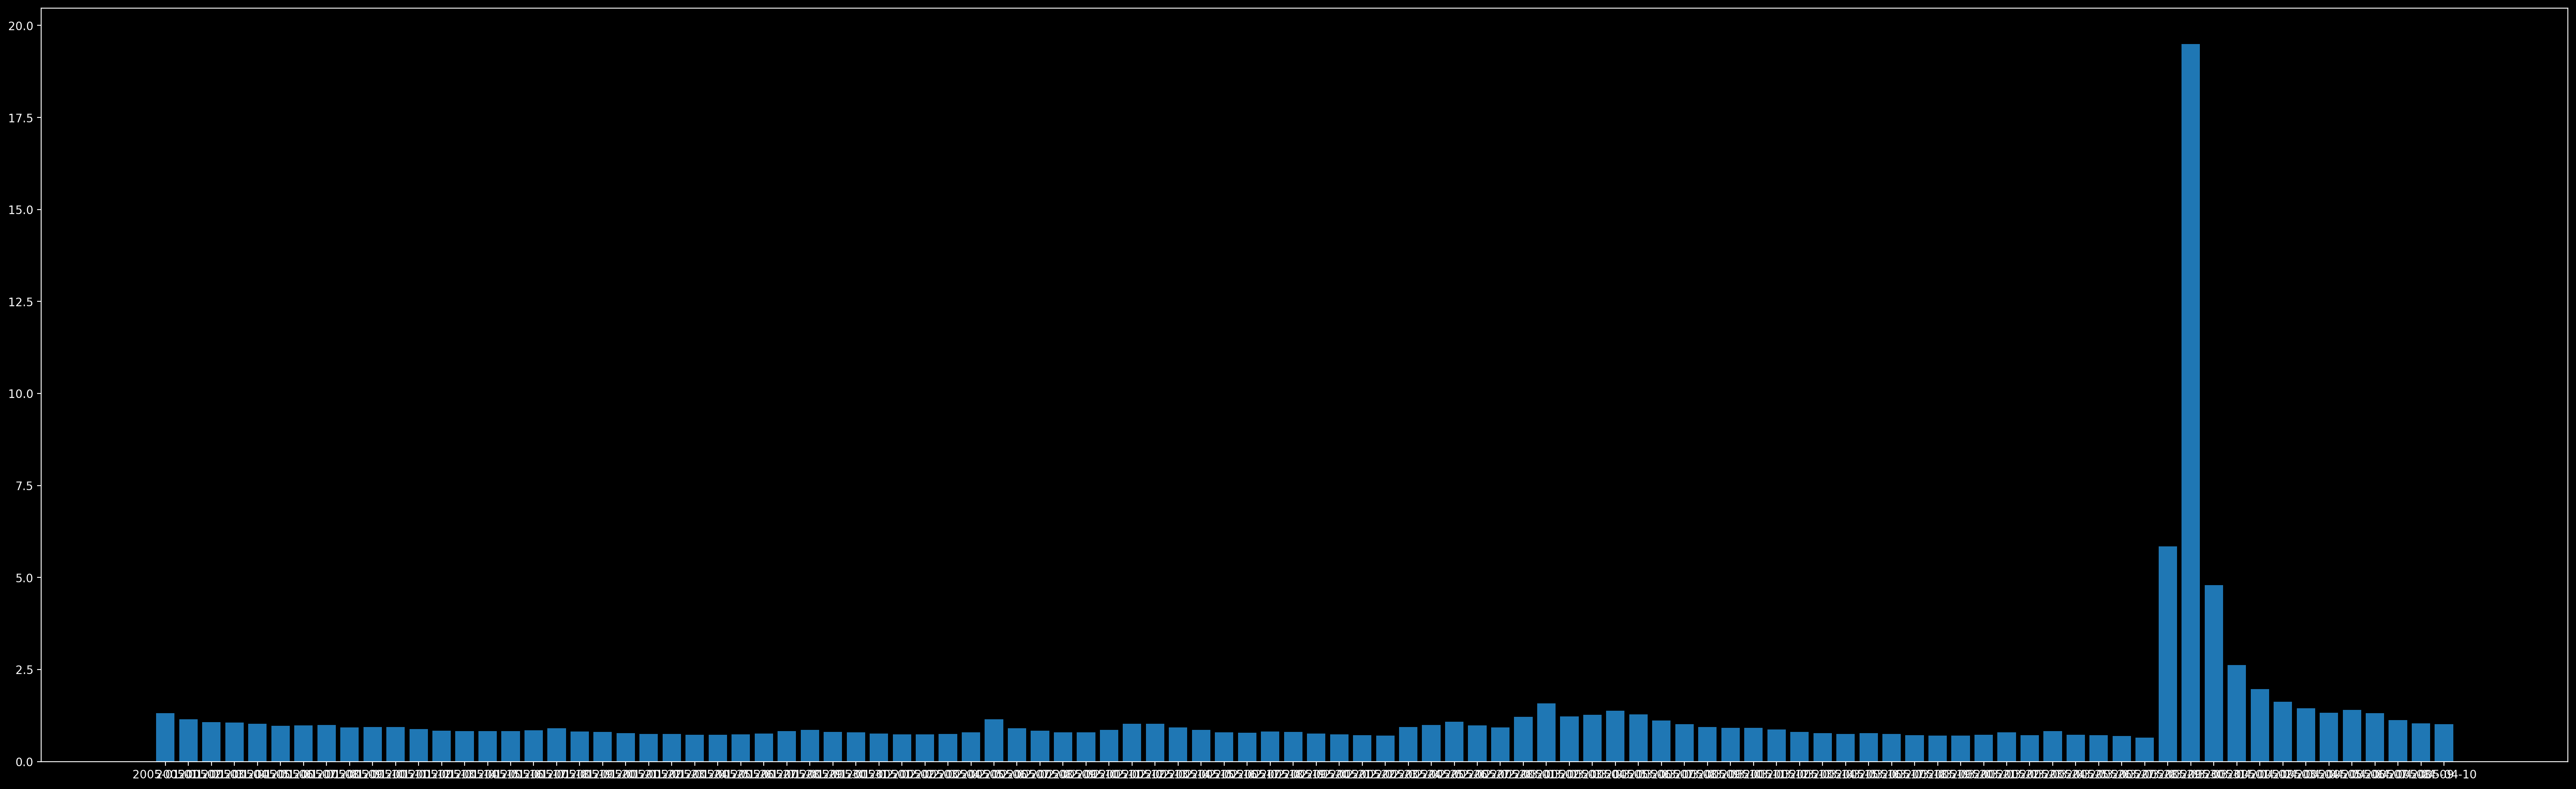

In [8]:
plt.figure(figsize=(40,12))
plt.bar(gdf_df['date'][:100],gdf_df['flow'][:100])